# Research Goal: Predict whether the cancer is benign or malignant.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy.stats as st
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("/content/data.csv", index_col = "id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,NaN
842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,NaN
84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,NaN
84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,NaN
84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,NaN


In [3]:
df = df.drop(columns = "Unnamed: 32")

In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207


In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().sum().sum()

0

In [9]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

B    357
M    212
Name: diagnosis, dtype: int64


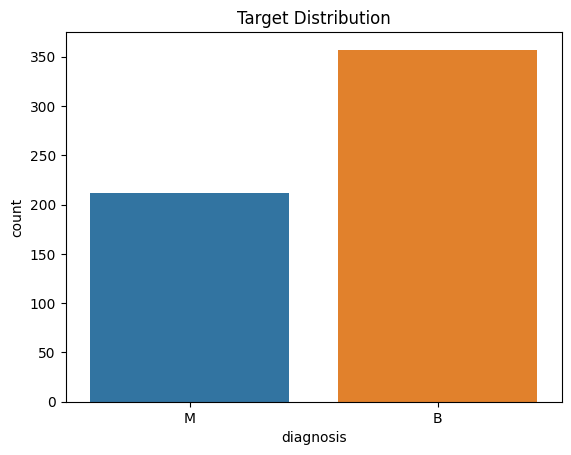

In [10]:
# target variable distribution
print(df.diagnosis.value_counts())
sns.countplot(x = df.diagnosis);
plt.title("Target Distribution")
plt.show()

In [11]:
#df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

## Outlier Analysis Function

In [12]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

## Hypothesis Testing Function

In [13]:
def hypotesis_testing(data, value, variable):
    frame=data[[variable, value]]
    formula=f'{value} ~ {variable}'
    model=ols(formula, frame).fit()
    print(model.summary(), "\n", "#"*50)

    p_value=np.round(model.f_pvalue, 3)
    print("p_value:", p_value)

    if p_value<0.05:
        print("Reject Null Hypothesis and accept the alternate hypothesis")
    else:
        print("Accept the Null Hypothesis")

## Data Analysis

## Handling Outliers

In [14]:
for col in df.loc[:, df.columns != 'diagnosis']:
  print(col, tukeys_method(df.loc[:, df.columns != 'diagnosis'], col))

radius_mean ([212], [82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521])
texture_mean ([239], [219, 232, 239, 259, 265, 455, 562])
perimeter_mean ([], [82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 461, 503, 521])
area_mean ([82, 180, 212, 352, 461], [23, 82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339, 352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564])
smoothness_mean ([504], [3, 105, 122, 504, 520, 568])
compactness_mean ([78], [0, 3, 9, 12, 14, 78, 82, 108, 122, 181, 190, 258, 351, 352, 400, 567])
concavity_mean ([], [0, 68, 78, 82, 108, 112, 122, 152, 180, 202, 212, 258, 351, 352, 400, 461, 563, 567])
concave points_mean ([], [78, 82, 108, 122, 180, 202, 212, 352, 393, 461])
symmetry_mean ([25], [3, 22, 25, 60, 78, 108, 122, 146, 150, 152, 258, 288, 323, 424, 561])
fractal_dimension_mean ([3, 152, 504, 505], [3, 9, 68, 71, 78, 151, 152, 176, 258, 318, 376, 379, 504, 505, 507])
radius_se ([122, 138, 212, 258, 417, 461, 503], [0, 12, 25, 27, 3

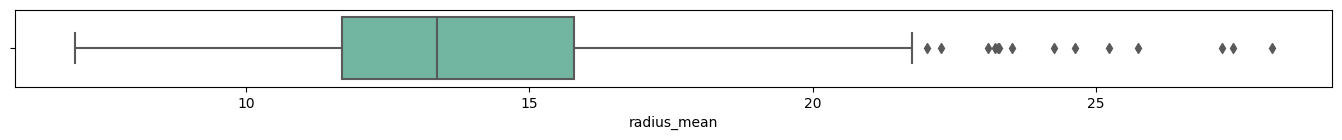

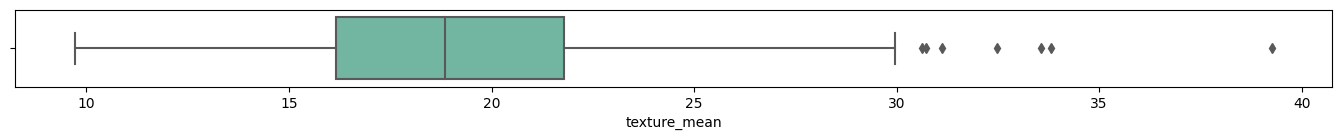

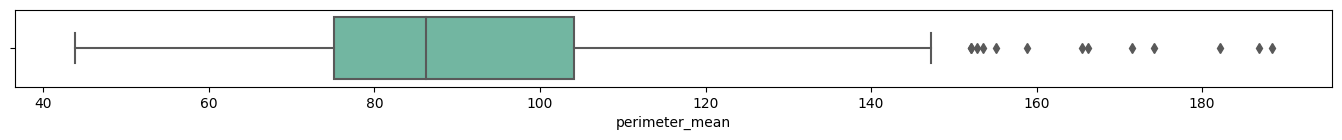

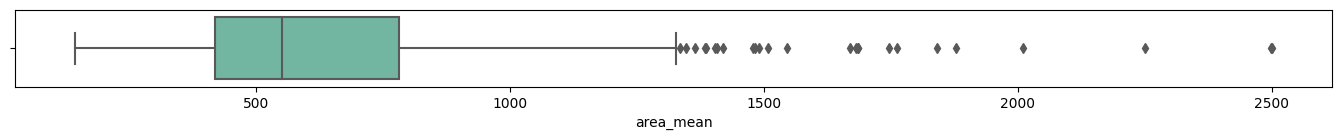

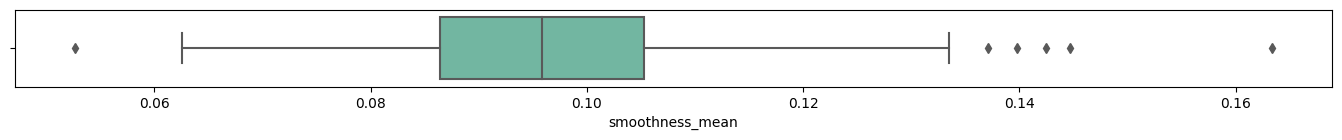

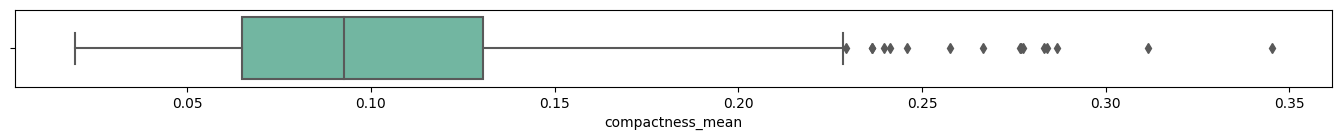

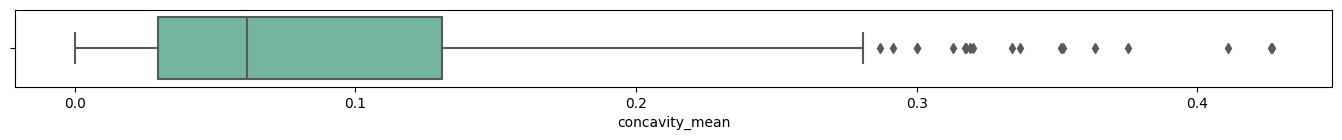

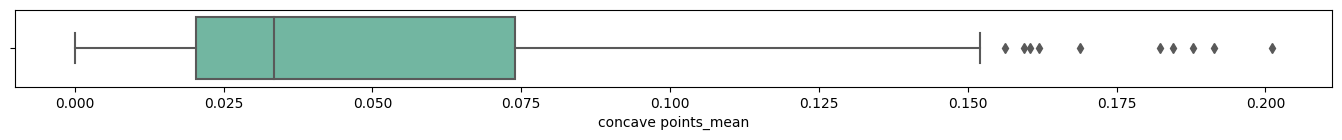

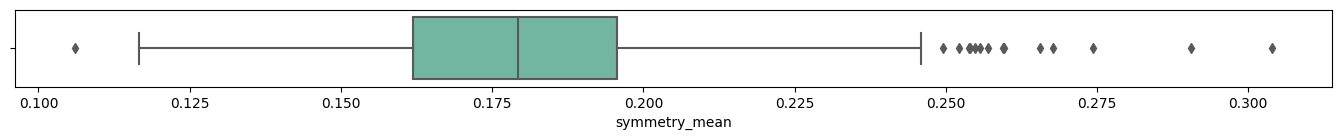

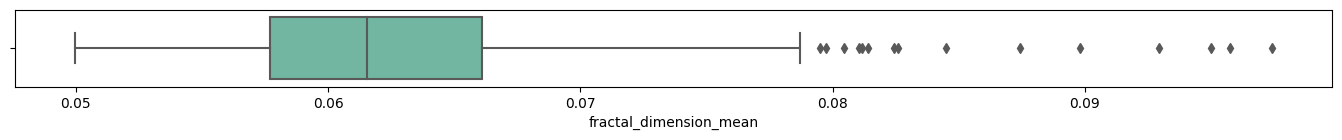

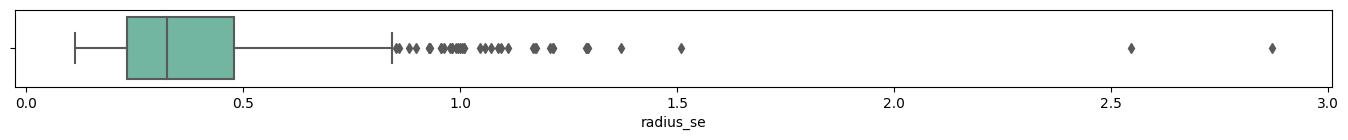

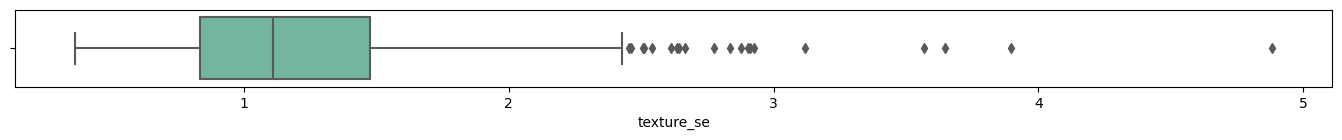

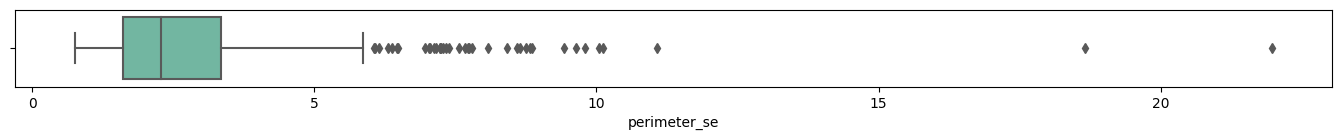

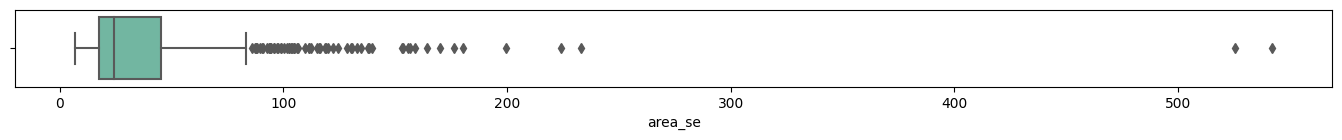

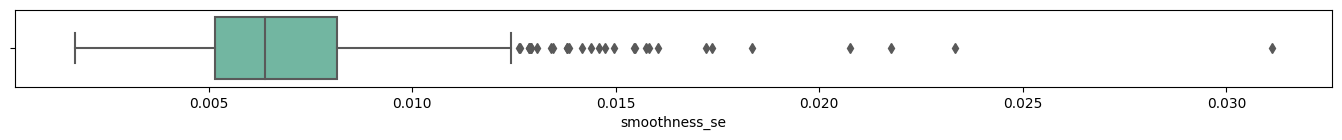

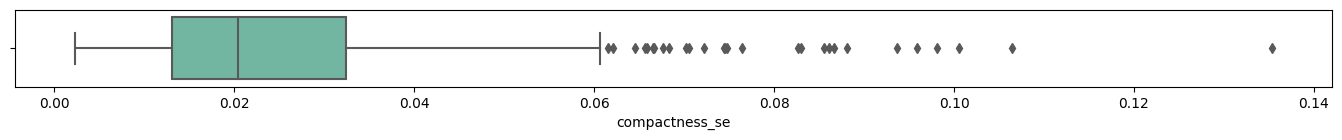

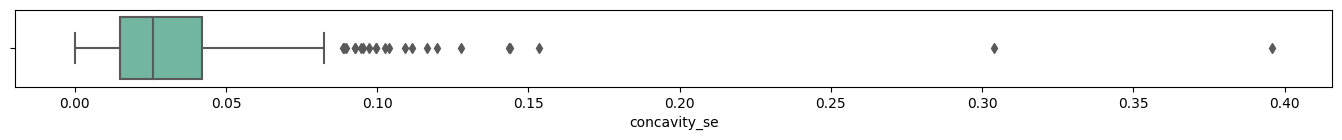

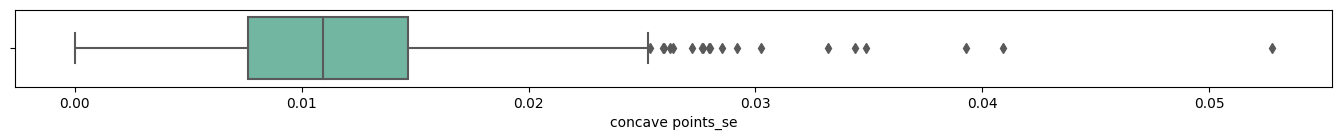

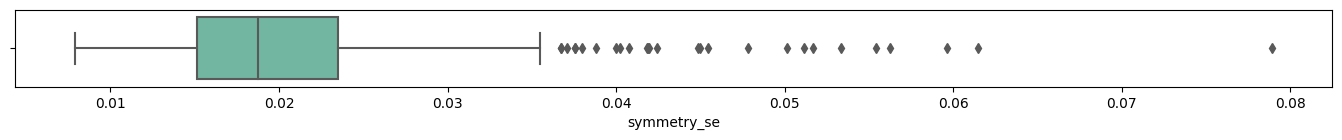

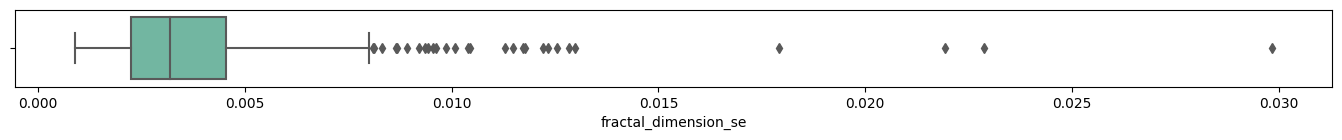

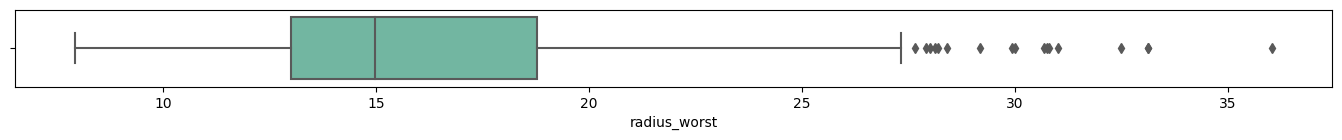

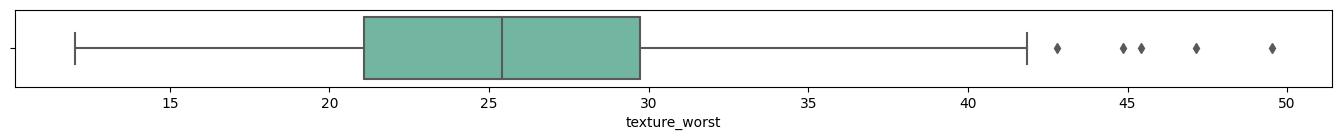

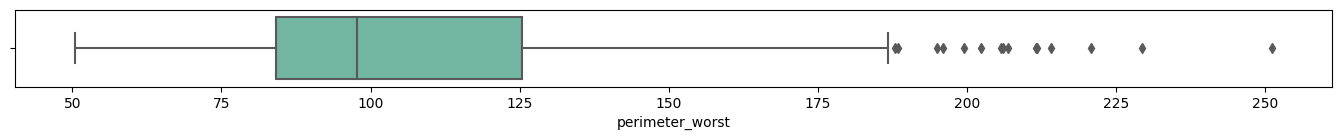

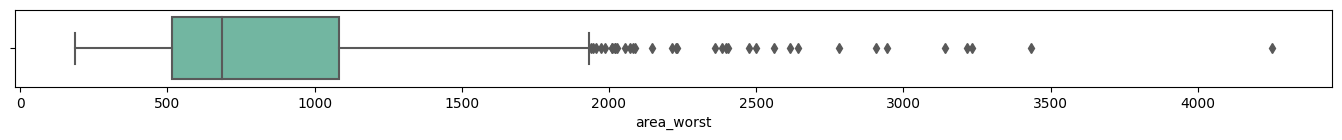

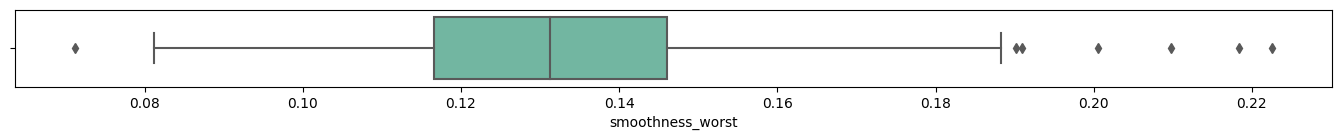

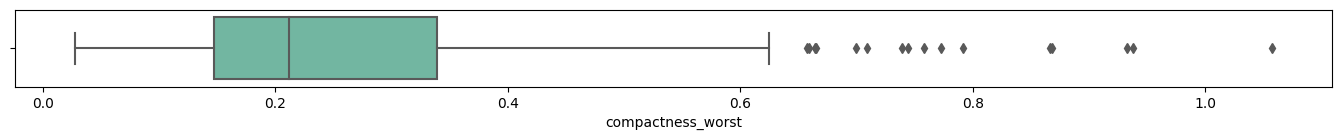

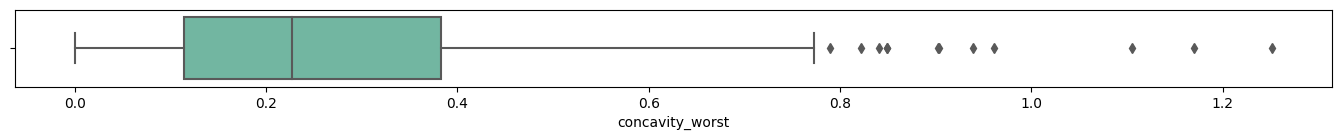

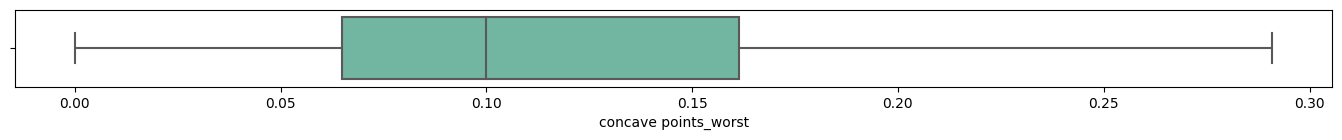

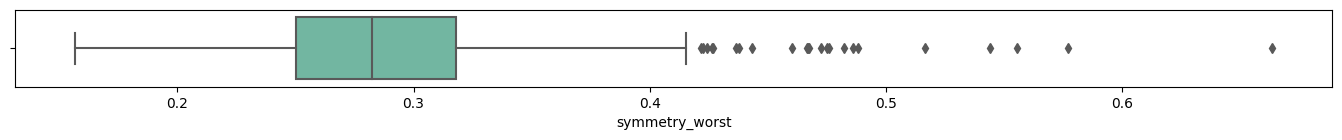

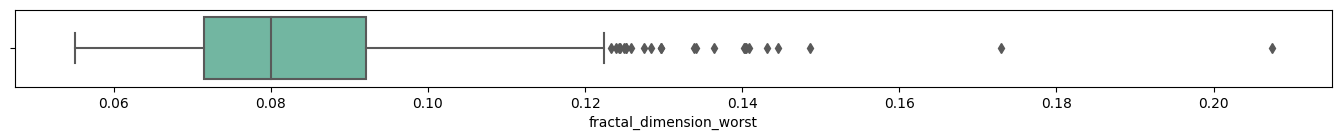

In [15]:
for column in df.loc[:, df.columns != 'diagnosis']:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, orient="h", palette="Set2", x=column)

In [16]:
for col in df.loc[:, df.columns != 'diagnosis']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - (whisker_width * iqr)
  upper_whisker = q3 + whisker_width * iqr
  df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

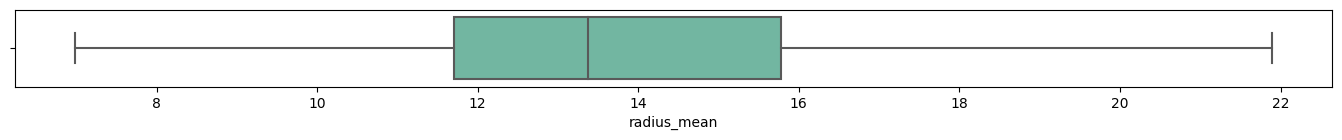

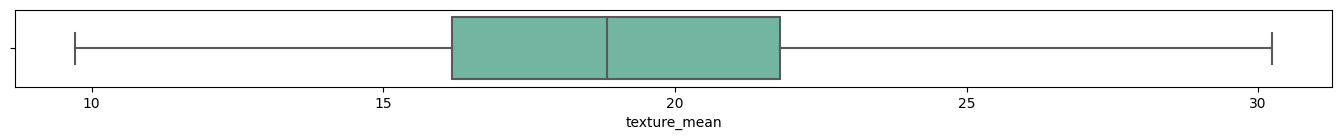

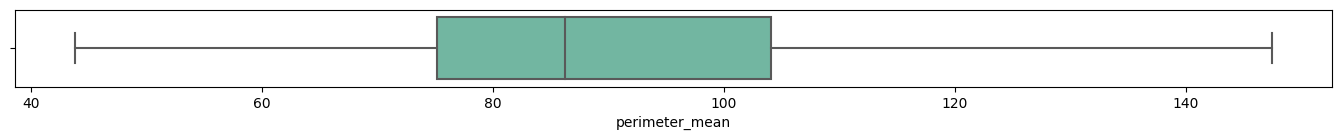

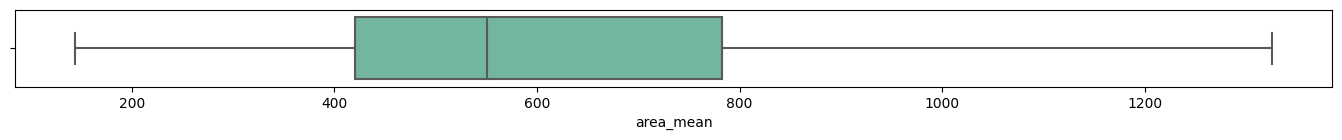

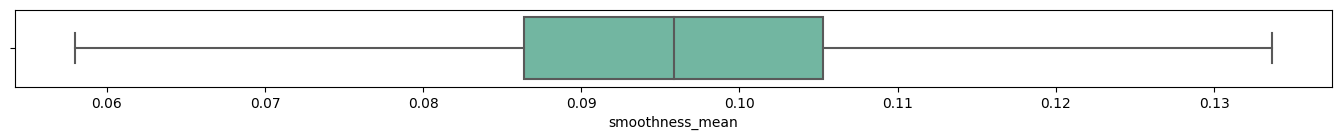

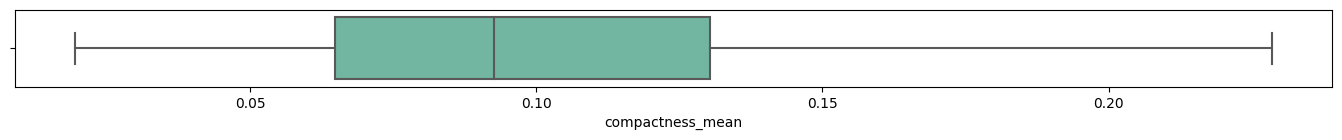

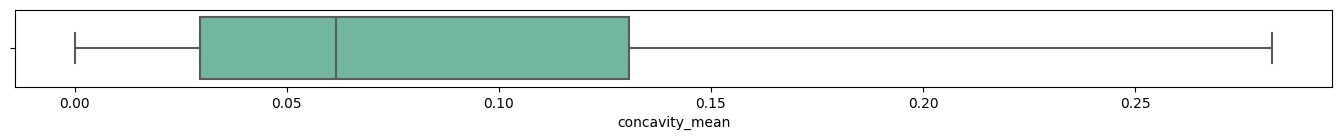

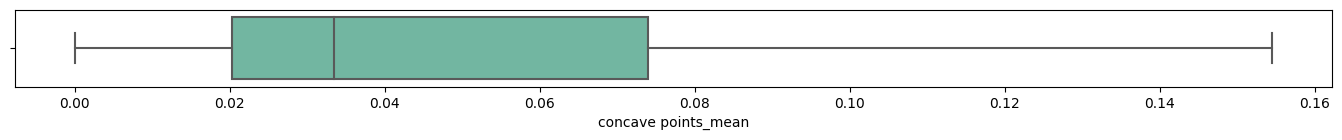

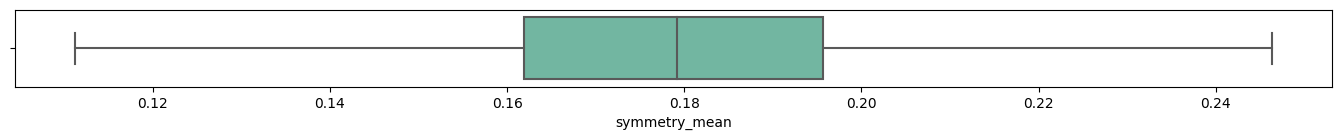

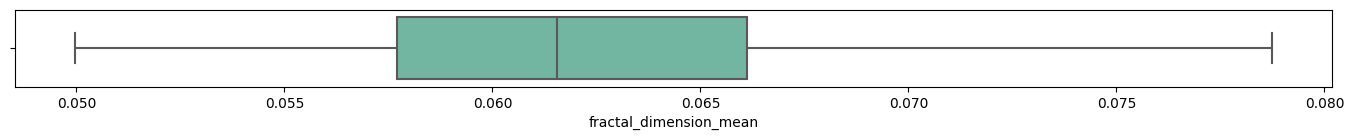

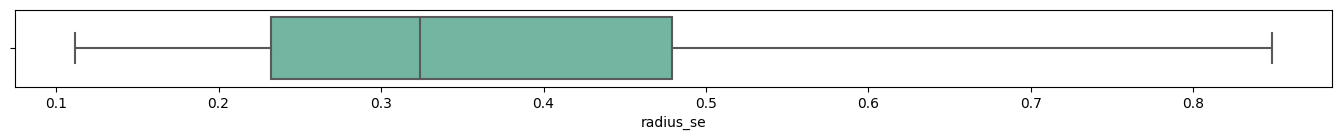

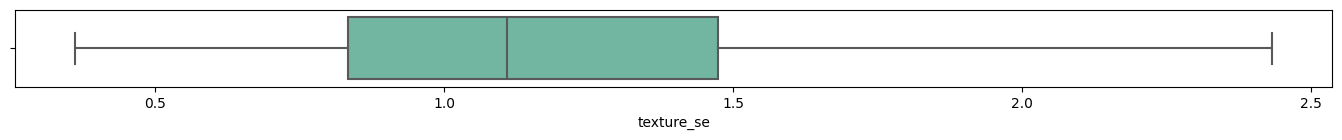

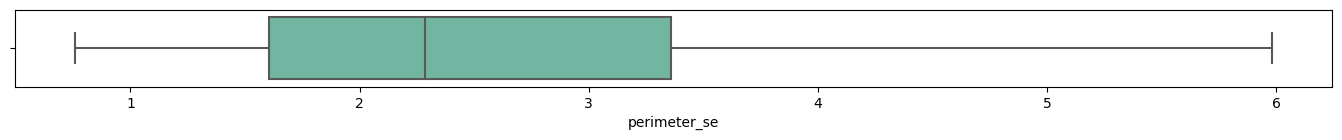

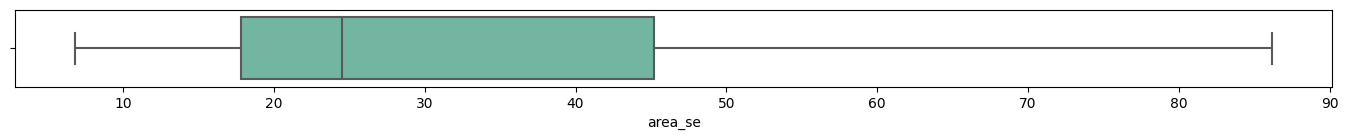

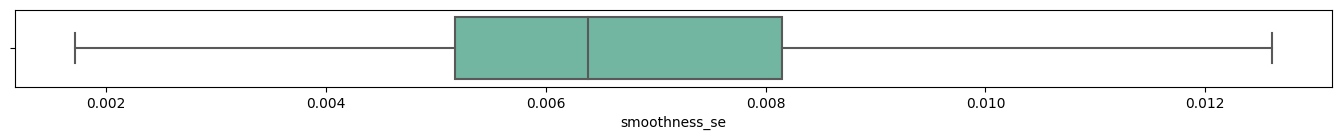

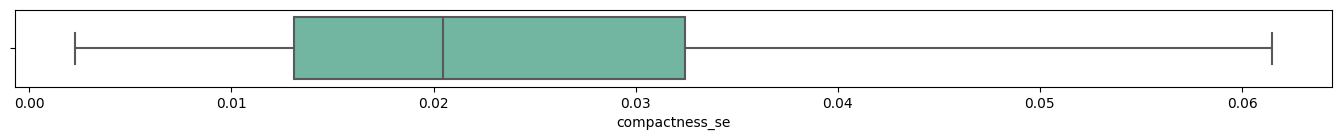

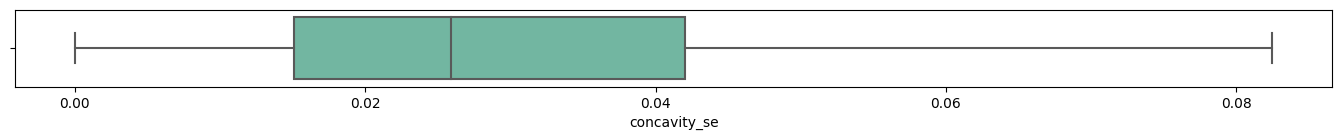

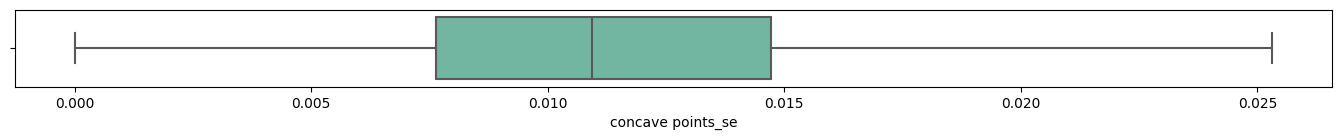

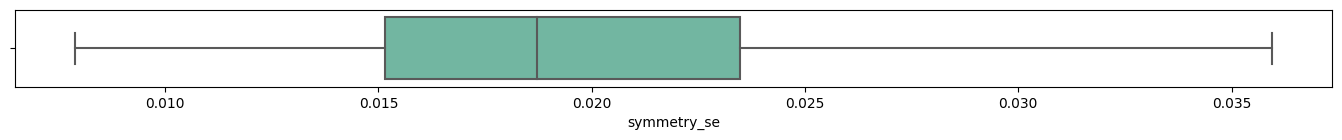

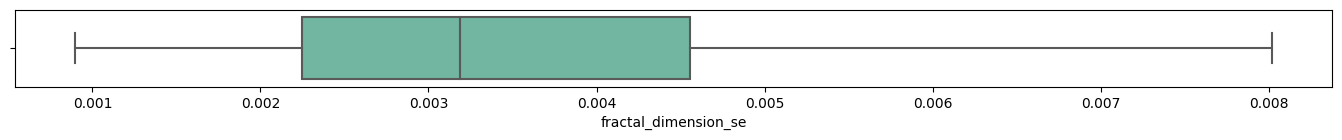

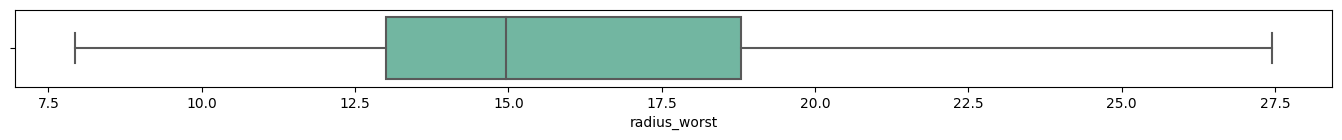

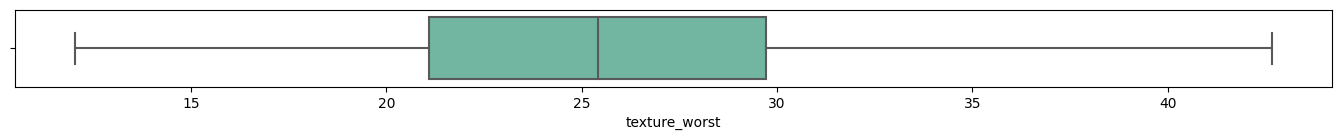

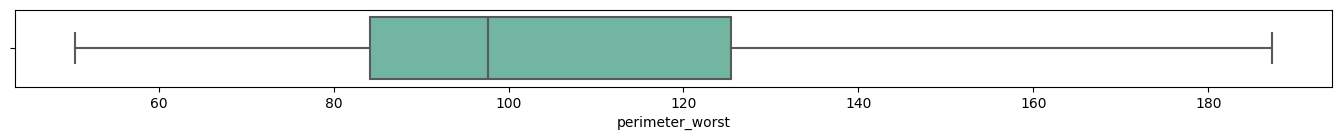

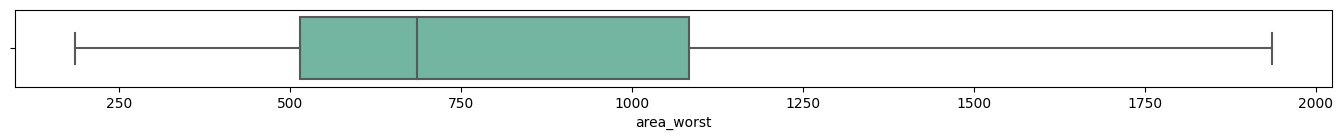

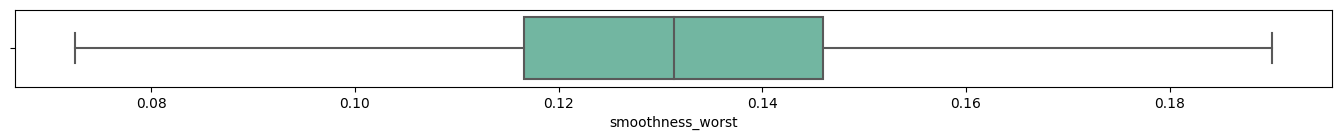

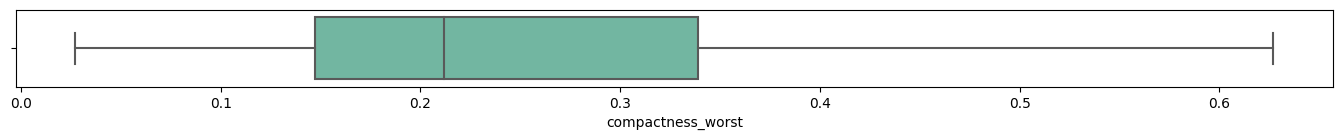

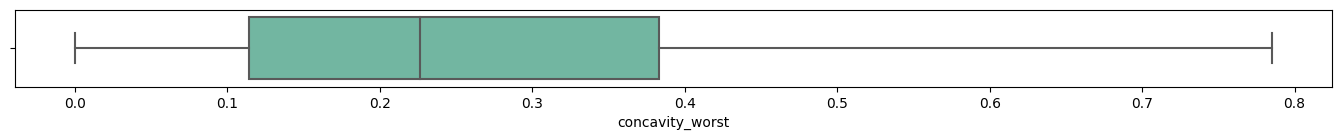

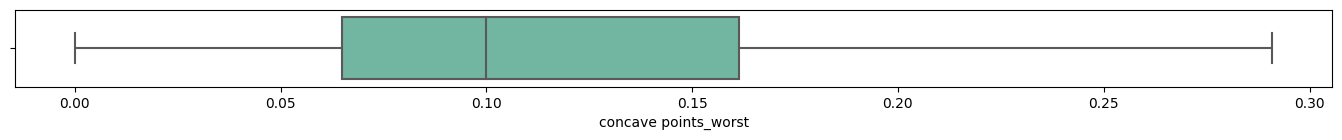

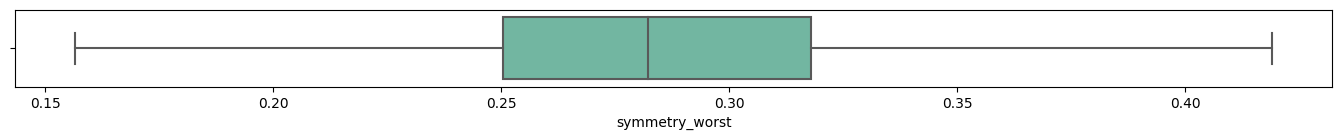

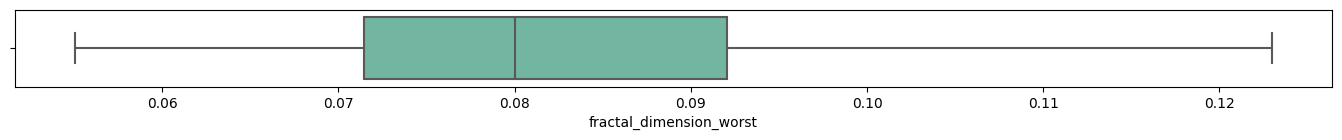

In [17]:
for column in df.loc[:, df.columns != 'diagnosis']:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, orient="h", palette="Set2", x=column)

## Exploratory Data Analysis

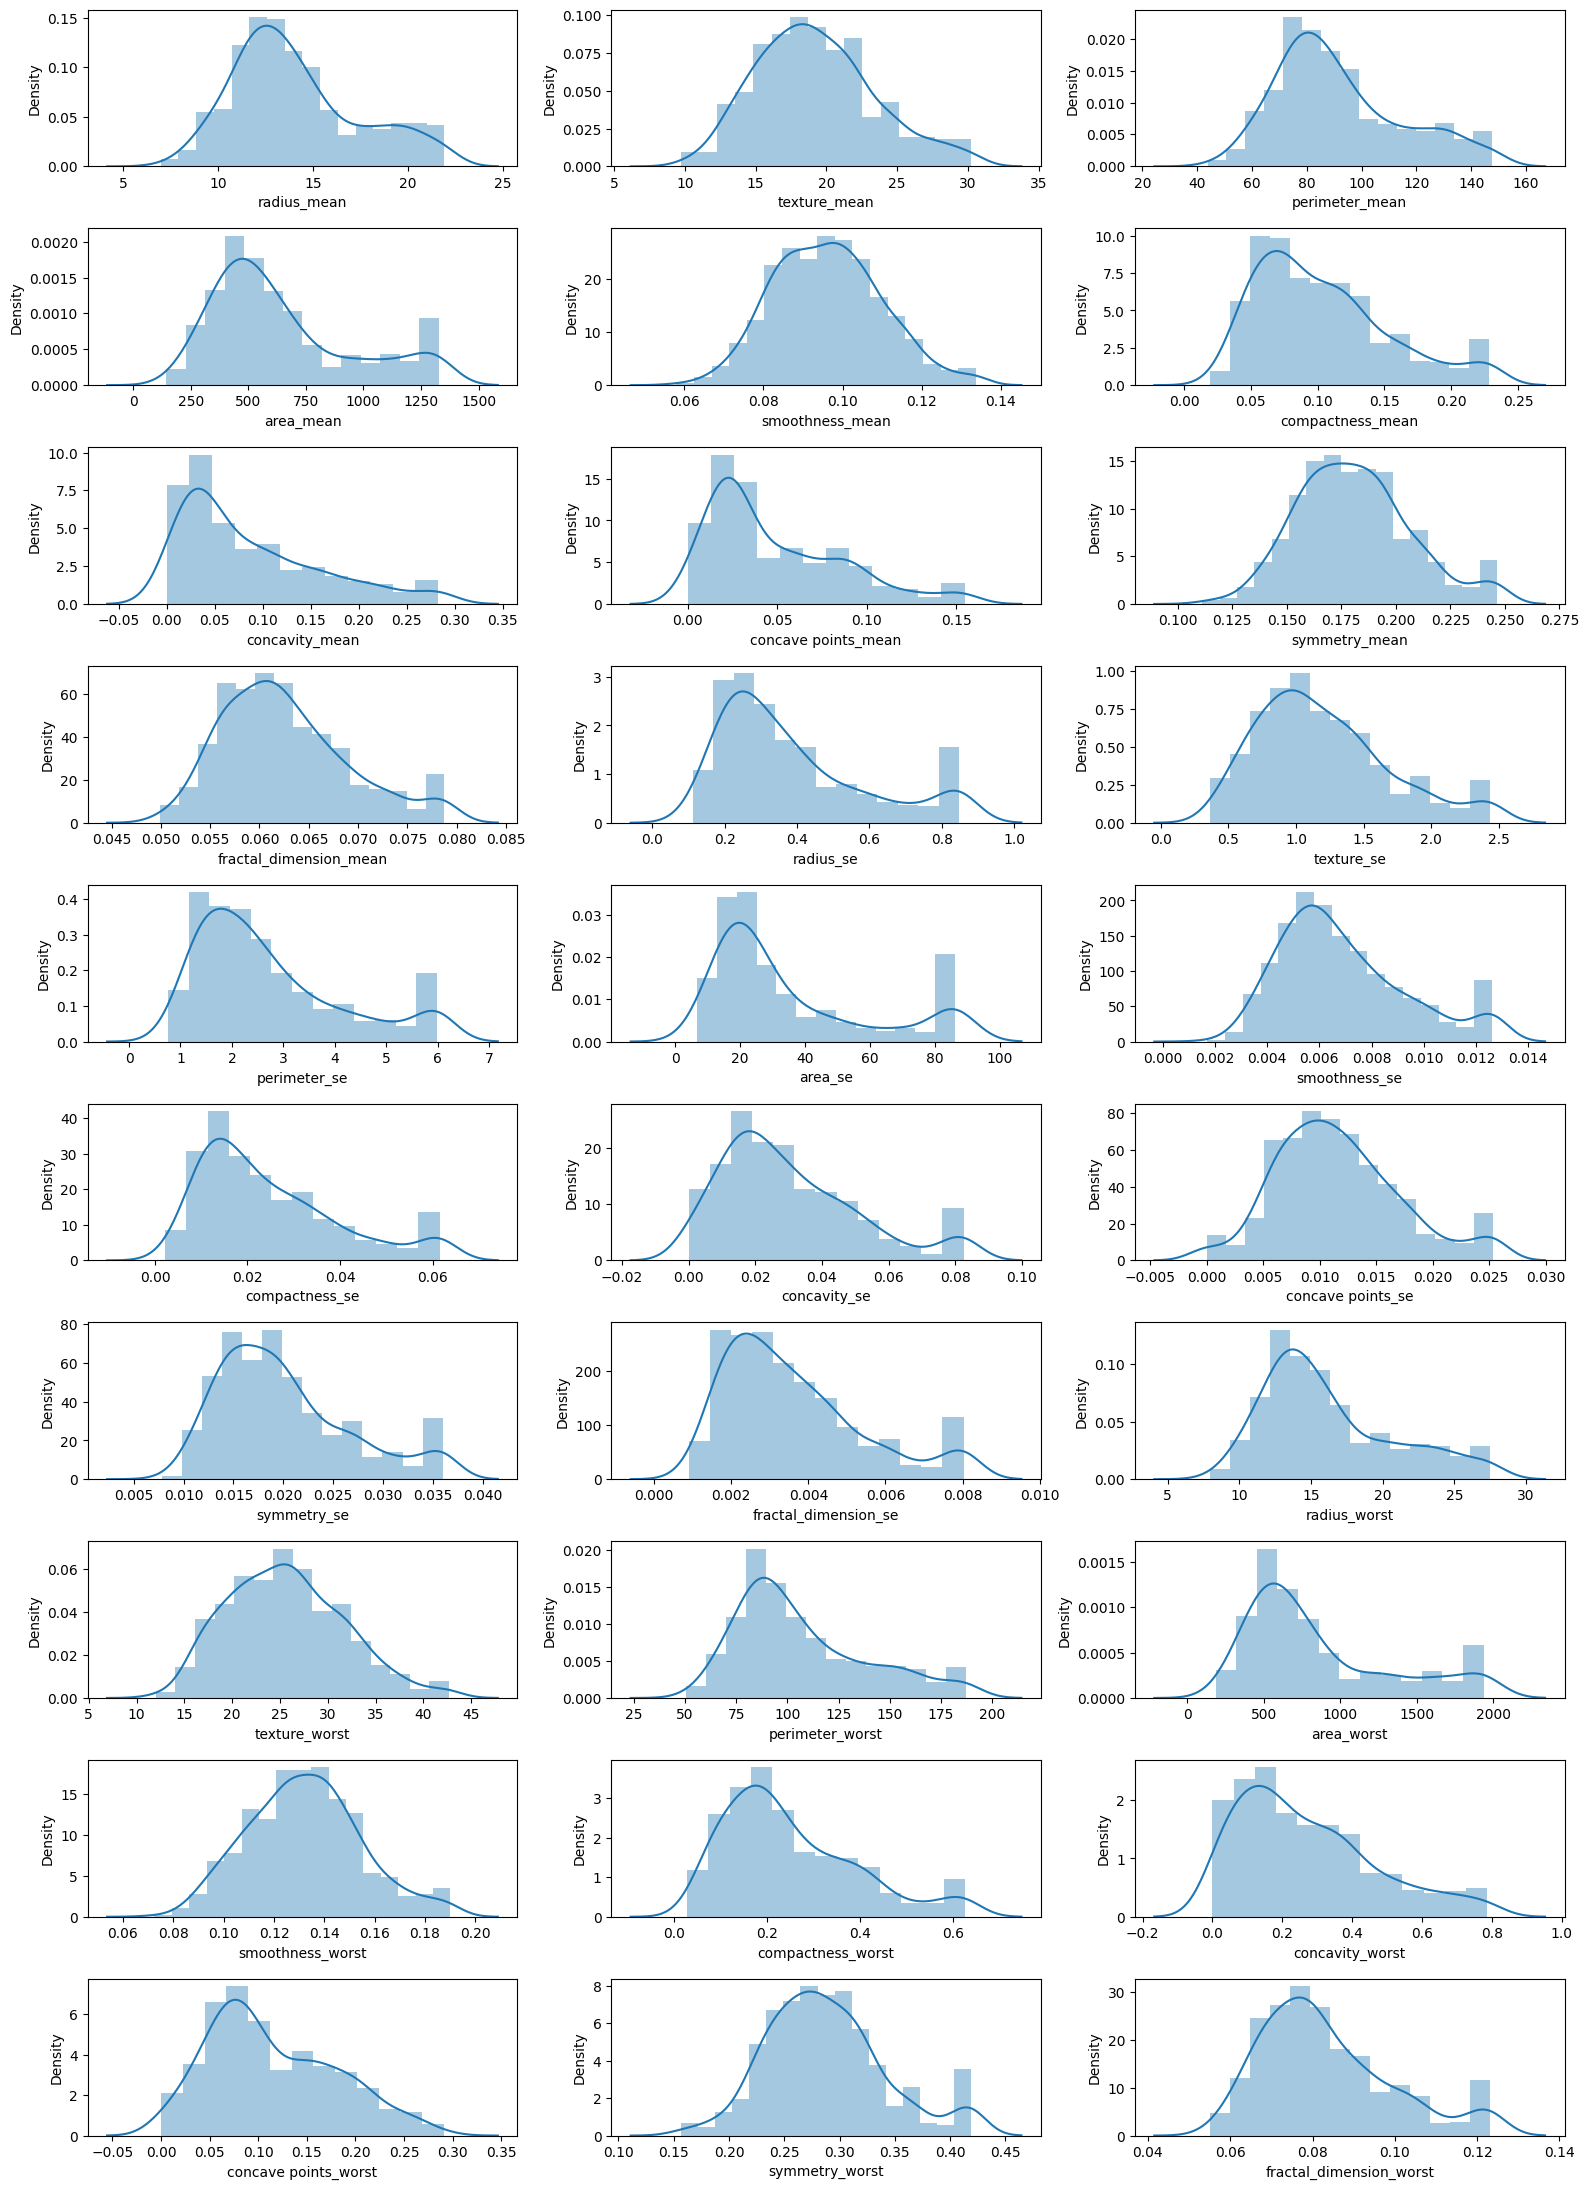

In [18]:
plt.figure(figsize = (16, 22))
plotnumber = 1

for column in df.loc[:, df.columns != 'diagnosis']:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Bivariate Distribution

In [19]:
fig = px.violin(df, y="radius_mean", x="diagnosis", box=True, points="all",title="Violin Plot of Radius mean by Diagnosis")

fig.update_layout(
    title_text="Distribution of Radius Mean by Diagnosis",
    xaxis_title_text="Radius Mean",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [20]:
fig = px.violin(df, y="area_mean", x="diagnosis", box=True, points="all",title="Violin Plot of Area mean by Diagnosis")

fig.update_layout(
    title_text="Distribution of Area Mean by Diagnosis",
    xaxis_title_text="Area Mean",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [21]:
fig = px.violin(df, y="radius_worst", x="diagnosis", box=True, points="all",title="Violin Plot of Radius worst by Diagnosis")

fig.update_layout(
    title_text="Distribution of Radius worst by Diagnosis",
    xaxis_title_text="Radius worst",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [22]:
fig = px.violin(df, y="area_worst", x="diagnosis", box=True, points="all",title="Violin Plot of Area worst by Diagnosis")

fig.update_layout(
    title_text="Distribution of Area worst by Diagnosis",
    xaxis_title_text="Area worst",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [23]:
fig = px.scatter(df, x="radius_mean", y="radius_worst", color="diagnosis",
                  title="Scatter Plot of Radius Mean vs Radius Worst by Diagnosis")

fig.show()

In [24]:
fig = px.scatter(df, x="area_mean", y="area_worst", color="diagnosis",
                  title="Scatter Plot of Area Mean vs Area Worst by Diagnosis")

fig.show()

In [25]:
# Create a scatter plot of area vs radius
fig = px.scatter(df, x="radius_mean", y="area_mean", color="diagnosis",
                 title="Area Mean vs Radius Mean")

# Add a trendline to the scatter plot
fig.update_traces(mode="markers+lines")
fig.update_layout(showlegend=True)

# Show the figure
fig.show()

## Correlation Analysis

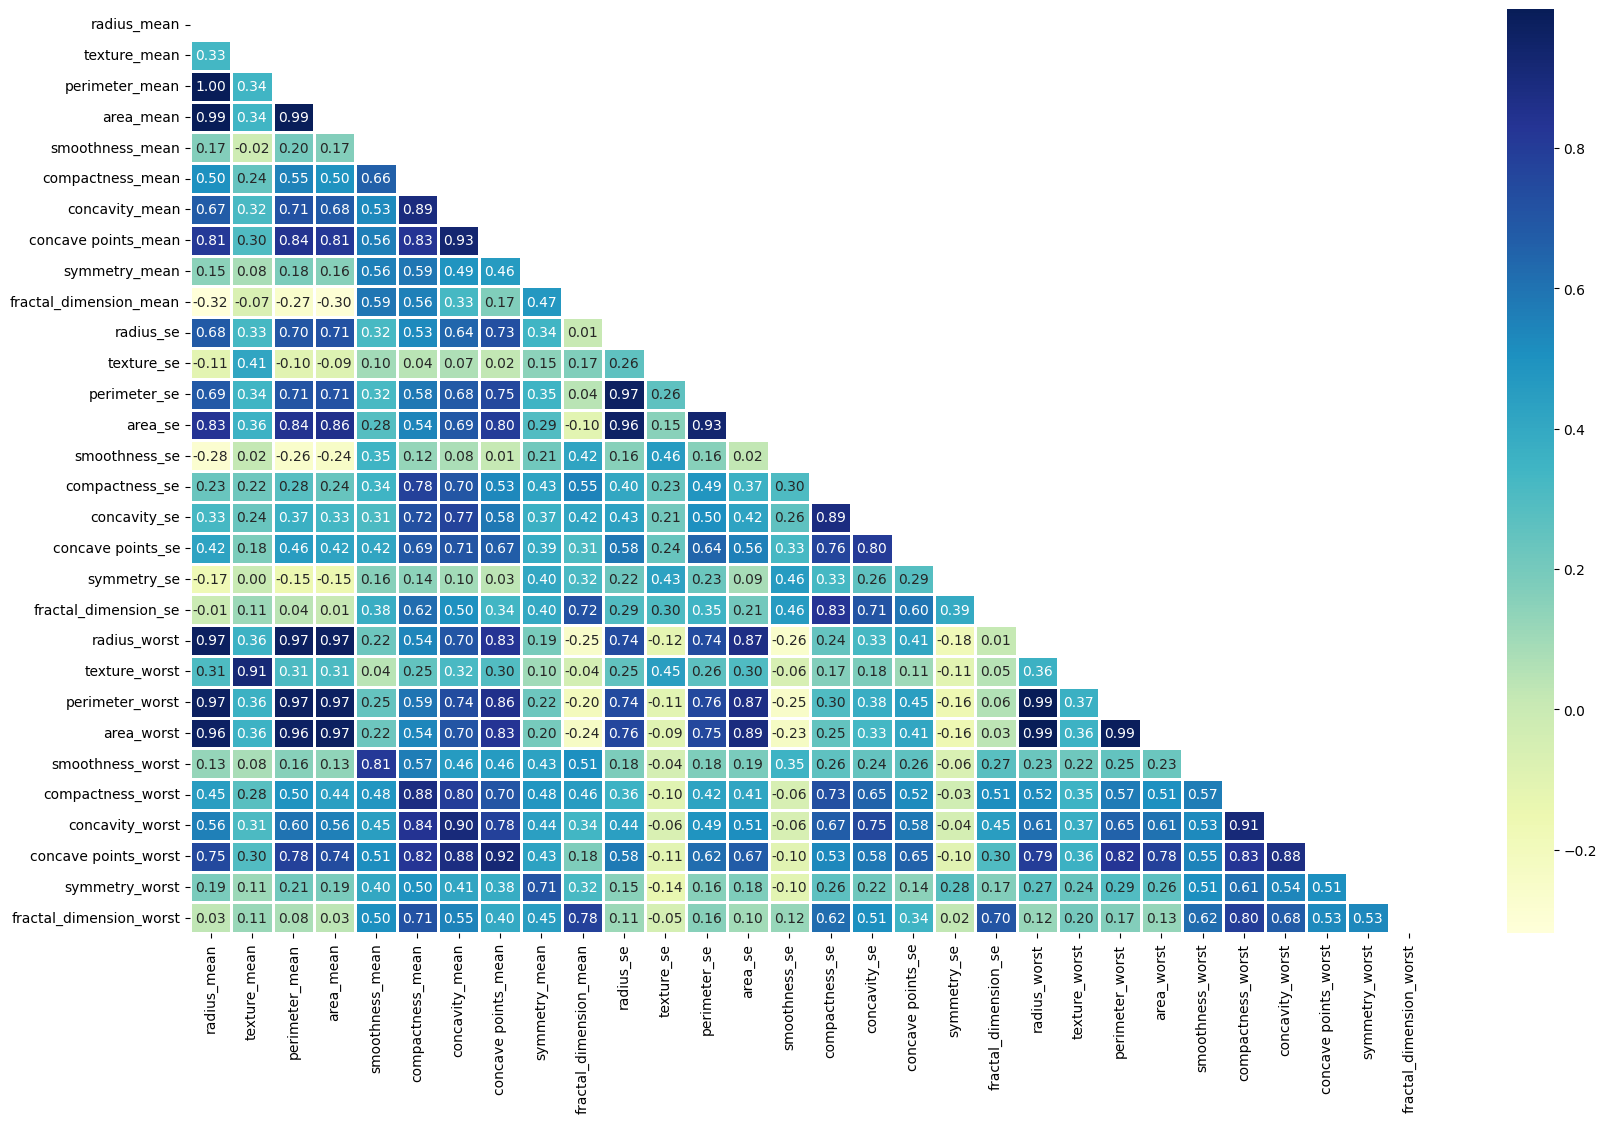

In [26]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='YlGnBu')
plt.show()

**Feature diversity is important in model training. However, as you can see above, there are columns that are highly correlated with many features other than the target variable. We can remove these features.**

In [27]:
# features with higher than threshold(0.96) correlation
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

high_corr = [x for x in tri_df.columns if any(tri_df[x] > 0.96)]

In [28]:
high_corr

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'radius_worst',
 'perimeter_worst']

In [29]:
# I selected 4 features by comparing the output of high_corr with the corr graph
df = df.drop(["perimeter_mean","area_mean","radius_mean","radius_worst"], axis = 1)

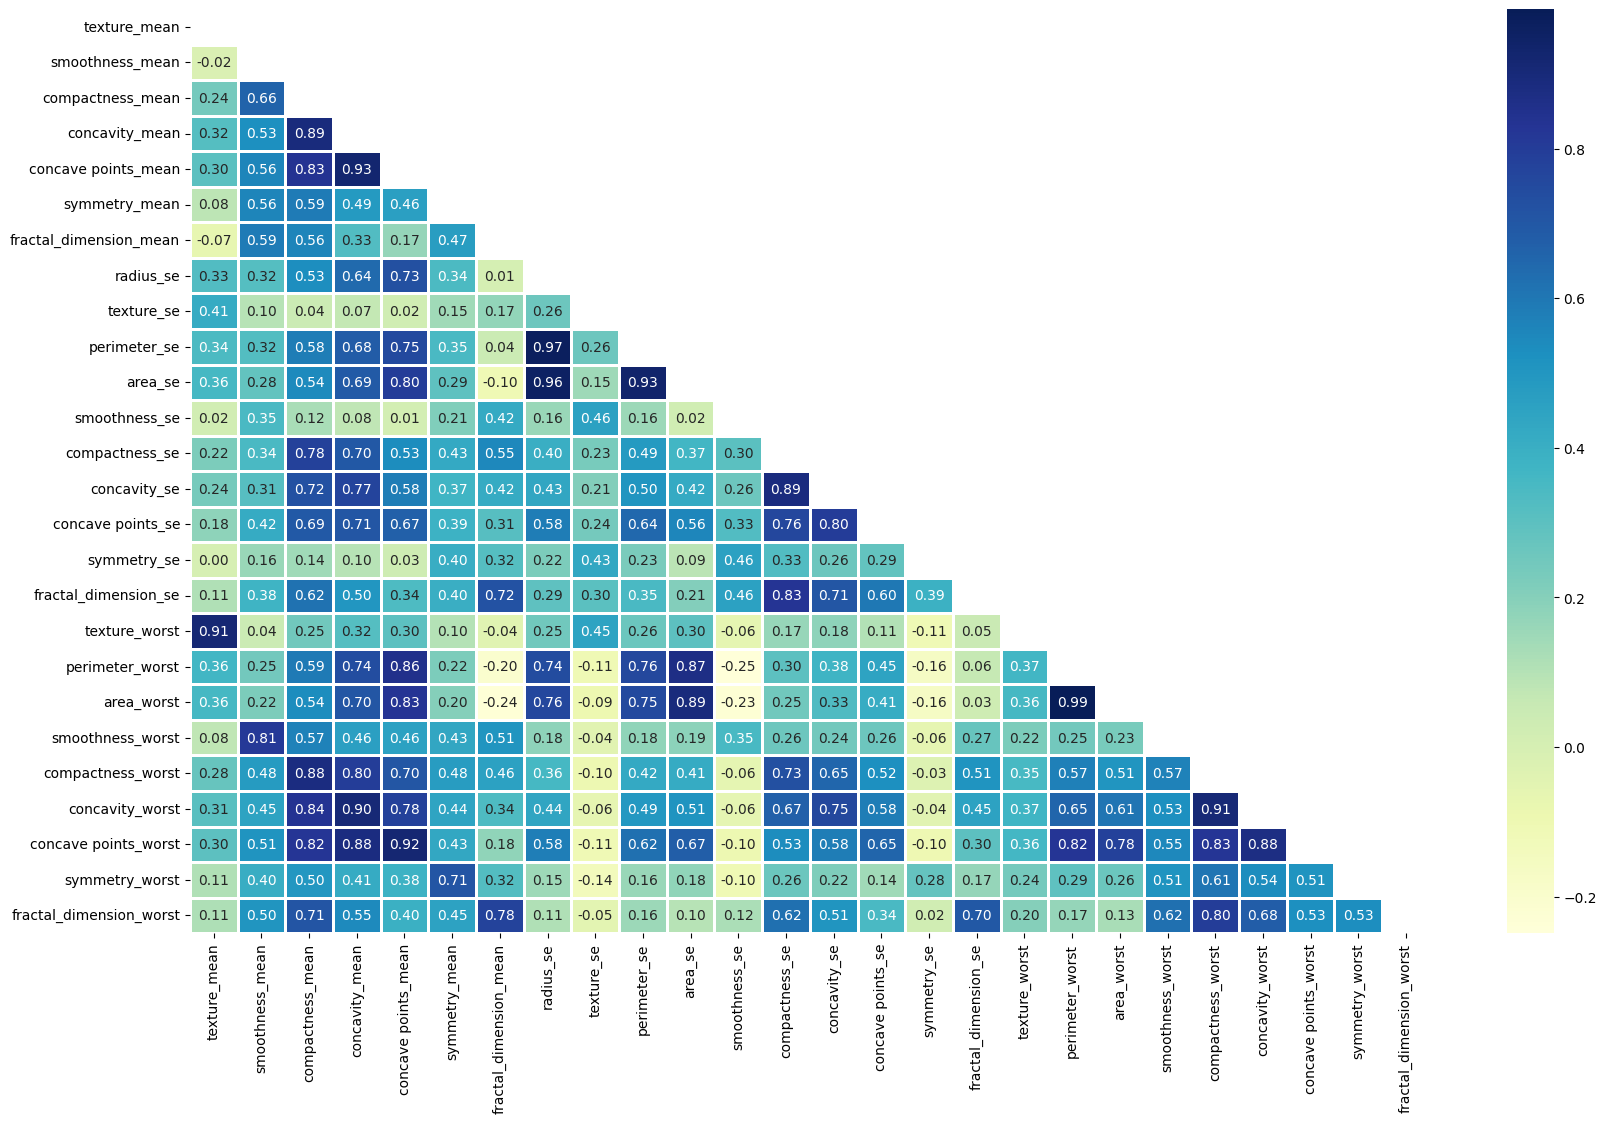

In [30]:
# correlation after drop
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='YlGnBu')
plt.show()

In [31]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,10.380,0.118,0.229,0.282,0.147,0.242,0.079,0.849,0.905,...,0.006,17.330,184.600,1937.050,0.162,0.627,0.712,0.265,0.419,0.119
842517,M,17.770,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,...,0.004,23.410,158.800,1937.050,0.124,0.187,0.242,0.186,0.275,0.089
84300903,M,21.250,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,...,0.005,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
84348301,M,20.380,0.134,0.229,0.241,0.105,0.246,0.079,0.496,1.156,...,0.008,26.500,98.870,567.700,0.190,0.627,0.687,0.258,0.419,0.123
84358402,M,14.340,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,...,0.005,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [32]:
df.shape

(569, 27)

## Principal Component Analysis (PCA)

Variance explained by component 1: 45.546113494911964
Variance explained by component 2: 15.676450661788957
Variance explained by component 3: 10.541960690972935
Variance explained by component 4: 7.1919963973827095
Variance explained by component 5: 6.135619137479069
Variance explained by component 6: 4.447962809039594
Variance explained by component 7: 2.282222439886587


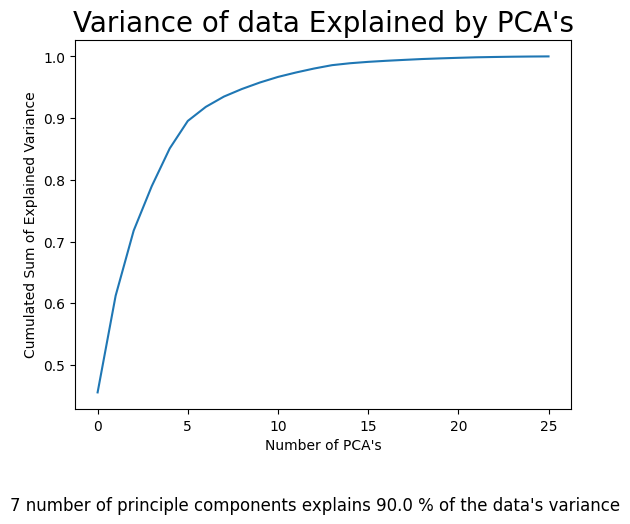

In [33]:
variance_thresh = 0.9
features = ['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)
ratios = pca.explained_variance_ratio_
for i in range(np.cumsum(ratios).shape[0]):
    num_pca = i + 1
    print(f"Variance explained by component {num_pca}: {ratios[i]*100}")
    if np.cumsum(ratios)[i] >= variance_thresh:
        txt = f"{num_pca} number of principle components explains {variance_thresh*100} % of the data's variance"
        break
    else:
        continue
x = np.arange(X_scaled.shape[1])
plt.plot(x, np.cumsum(ratios))
plt.xlabel("Number of PCA's")
plt.ylabel("Cumulated Sum of Explained Variance")
plt.title("Variance of data Explained by PCA's",fontsize=20)
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

We can observe that first 7 components explains about 90% of the data's variance, where the total number of initial features is 30. Now we will visualise the dataset, using the first two principal components.

## Visualising the dataset using PCA

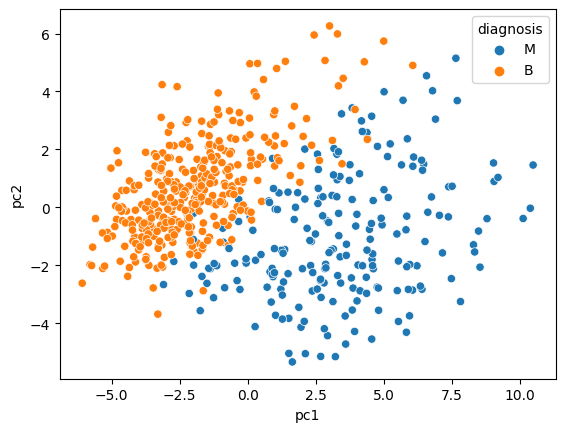

In [34]:
#We will apply threshold on the number of components to visualise the data.
pca = PCA(n_components=3) #We can also just use 2 components, incase there is no plan for 3-D plots
pca_data = pca.fit_transform(X_scaled)
df_pc = pd.DataFrame(pca_data)
df_pc['diagnosis'] = df.diagnosis.values
df_pc.columns = ['pc1','pc2','pc3','diagnosis']
plt.figure()
sns.scatterplot(data=df_pc, x="pc1", y="pc2", hue="diagnosis")
plt.show()
plt.close('all')

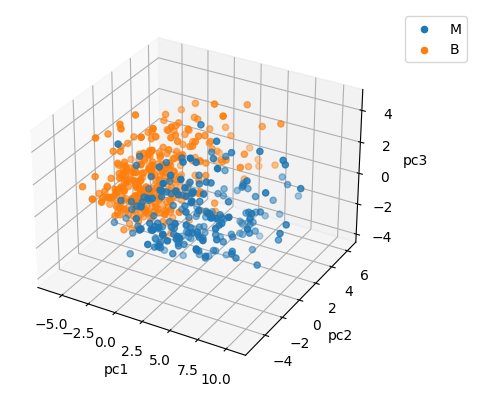

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for diagnosis in df_pc.diagnosis.unique():
    ax.scatter(df_pc.pc1[df_pc.diagnosis==diagnosis],df_pc.pc2[df_pc.diagnosis==diagnosis],df_pc.pc3[df_pc.diagnosis==diagnosis],label=diagnosis)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.close('all')

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.264s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.492506
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.441071
[t-SNE] KL divergence after 950 iterations: 0.768613


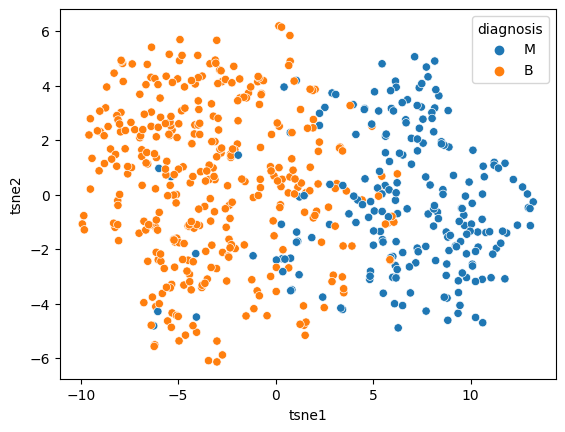

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(z)
df_tsne.columns=['tsne1','tsne2','tsne3']
df_tsne['diagnosis'] = df['diagnosis'].values
plt.figure()
sns.scatterplot(data=df_tsne, x="tsne1", y="tsne2", hue="diagnosis")
plt.show()
plt.close('all')

In [37]:
import plotly.express as px
fig = px.scatter(df_tsne, x="tsne1", y="tsne2", color="diagnosis"
                 #size='petal_length', hover_data=['petal_width']
                )
fig.show()

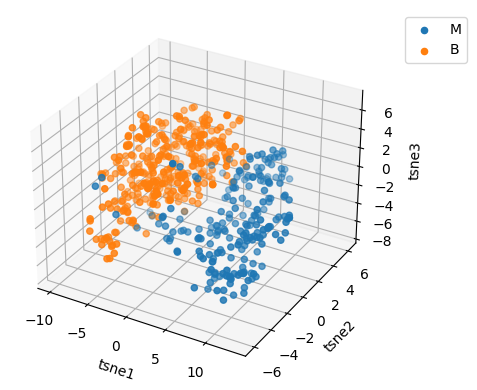

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for diagnosis in df_tsne.diagnosis.unique():
    ax.scatter(df_tsne.tsne1[df_tsne.diagnosis==diagnosis],df_tsne.tsne2[df_tsne.diagnosis==diagnosis],df_tsne.tsne3[df_tsne.diagnosis==diagnosis],label=diagnosis)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_zlabel('tsne3')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.close('all')

## Summary
Some important observations about both the dimentionality reduction technique can be summarized as:

We can't say which dimentionality reduction technique is better, as it heavily depends on the dataset we are using them
PCA is a linear dimentionality reduction technique as each transformed datapoint is a linear combination of the original set, where as t-SNE is non-linear
PCA algorithm uses the covariance matrix of entire data to perform the dimentionality reduction. Hence, the algorithm will give same results in multiple runs. On the other hand, t-SNE performs an iterative optimization algorithm , which can produce different results in multiple runs. This may be important if you are considering the reporducibility, especially when doing predictive modeling.
t-SNE is prefered over PCA in non-linear datasets, especially for images and texts.
The only important hyperparameter is PCA is the number of reduced components required, and it is very straightforward, where as t-SNE depends on a set of different hyperparameters. Selecting the optimum hyperparameters can be time-consuming and difficult for t-SNE.
Both are very efficient data-visualisation tools, which can be used to understand high dimentional datasets

## Modeling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
from sklearn.pipeline import make_pipeline

In [40]:
features = df.drop(['diagnosis'], axis = 1)
labels = df['diagnosis']

In [41]:
np.unique(labels, return_counts = True)

(array(['B', 'M'], dtype=object), array([357, 212]))

In [42]:
from imblearn.under_sampling import AllKNN
features, labels = AllKNN(n_neighbors = 7).fit_resample(features, labels)

In [43]:
np.unique(labels, return_counts = True)

(array(['B', 'M'], dtype=object), array([255, 212]))

In [44]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [45]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
features = np.array(features)
labels = np.array(labels)

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2,
                                               stratify = labels, random_state = True)

In [48]:
xtrain.shape, xtest.shape

((373, 26), (94, 26))

In [49]:
np.unique(ytest, return_counts = True)

(array([0, 1]), array([51, 43]))

In [50]:
def K_fold(xtrain, ytrain, estimator):
    fold_k = StratifiedKFold(n_splits = 20).split(xtrain, ytrain)
    xtrain_f, xvalid_f,ytrain_f, yvalid_f = [], [], [], []
    for k , (train, valid) in enumerate(fold_k):
        xtrain_f.append(xtrain[train]), xvalid_f.append(xtrain[valid])
        ytrain_f.append(ytrain[train]), yvalid_f.append(ytrain[valid])
        estimator.fit(xtrain[train], ytrain[train])
        st = 'k: {}, train acc: {}, and validation acc: {}'.format(k, estimator.score(xtrain[train], ytrain[train]),
                                                           estimator.score(xtrain[valid], ytrain[valid]))
        print(st)
    return xtrain_f, xvalid_f,ytrain_f, yvalid_f

# LogisticRegression Classifier

In [51]:
logistic_regression_pipe = make_pipeline(
    RobustScaler(),
    KernelPCA(kernel = 'rbf', n_components = 20),
    LogisticRegression(solver = 'lbfgs',C = 100, random_state = 1, multi_class = 'ovr',
                      class_weight = 'balanced', max_iter = 3000)
)

In [52]:
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 50, 100, 1000]
train_scores , validation_scores = validation_curve(estimator = logistic_regression_pipe,
                                                   X = xtrain, y = ytrain,
                                                   param_name = 'logisticregression__C',
                                                   param_range = param_range,
                                                   scoring = 'accuracy',
                                                   cv = 10)

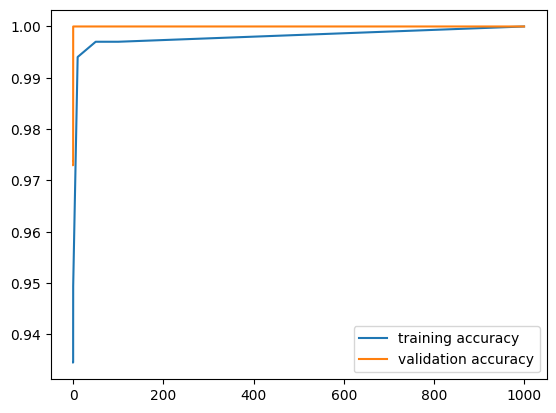

In [53]:
plt.plot(param_range, np.max(train_scores, axis = 1), label = 'training accuracy')
plt.plot(param_range, np.max(validation_scores, axis = 1), label = 'validation accuracy')
plt.legend()

In [54]:
logisticregression_search = GridSearchCV(
                                        scoring = 'accuracy',
                                        estimator = logistic_regression_pipe,
                                        param_grid = [{
                                            'logisticregression__solver': ['lbfgs', 'liblinear'],
                                            'logisticregression__C': param_range
                                        }],
                                        cv = 10)
logisticregression_search.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('kernelpca',
                                        KernelPCA(kernel='rbf',
                                                  n_components=20)),
                                       ('logisticregression',
                                        LogisticRegression(C=100,
                                                           class_weight='balanced',
                                                           max_iter=3000,
                                                           multi_class='ovr',
                                                           random_state=1))]),
             param_grid=[{'logisticregression__C': [1e-05, 0.0001, 0.001, 0.01,
                                                    0.1, 10, 50, 100, 1000],
                          'logisticregression__solver': ['lbfgs',
                                                         'liblinear']}],
             scoring='accuracy')

In [55]:
logisticregression_search.best_score_

0.9784495021337127

In [56]:
logisticregression_search.best_params_

{'logisticregression__C': 10, 'logisticregression__solver': 'lbfgs'}

In [57]:
logistic_regression_pipe = logisticregression_search.best_estimator_

In [58]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain,
                                               ytrain,
                                               logistic_regression_pipe)

k: 0, train acc: 0.9830508474576272, and validation acc: 1.0
k: 1, train acc: 0.9830508474576272, and validation acc: 1.0
k: 2, train acc: 0.9858757062146892, and validation acc: 1.0
k: 3, train acc: 0.9858757062146892, and validation acc: 1.0
k: 4, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 5, train acc: 0.9858757062146892, and validation acc: 1.0
k: 6, train acc: 0.980225988700565, and validation acc: 1.0
k: 7, train acc: 0.980225988700565, and validation acc: 1.0
k: 8, train acc: 0.9830508474576272, and validation acc: 1.0
k: 9, train acc: 0.9830508474576272, and validation acc: 1.0
k: 10, train acc: 0.9887005649717514, and validation acc: 0.9473684210526315
k: 11, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 12, train acc: 0.9830508474576272, and validation acc: 0.8947368421052632
k: 13, train acc: 0.9859154929577465, and validation acc: 0.9444444444444444
k: 14, train acc: 0.9830985915492958, and validation acc: 1.0
k: 15, 

In [59]:
index = 3
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
logistic_regression_pipe.fit(xtrain, ytrain)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kernelpca', KernelPCA(kernel='rbf', n_components=20)),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=3000, multi_class='ovr',
                                    random_state=1))])

In [60]:
len(xtraining), len(xvalid)

(354, 19)

In [61]:
logistic_regression_pipe.score(xtraining, ytraining)

0.9830508474576272

In [62]:
logistic_regression_pipe.score(xvalid, yvalid)

1.0

In [63]:
logistic_regression_pipe.score(xtest, ytest)

0.9787234042553191

In [64]:
y_pred = logistic_regression_pipe.predict(xtest)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

In [65]:
accuracy_score(y_pred, ytest)*100

97.87234042553192

In [66]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        43

    accuracy                           0.98        94
   macro avg       0.98      0.98      0.98        94
weighted avg       0.98      0.98      0.98        94



<Axes: >

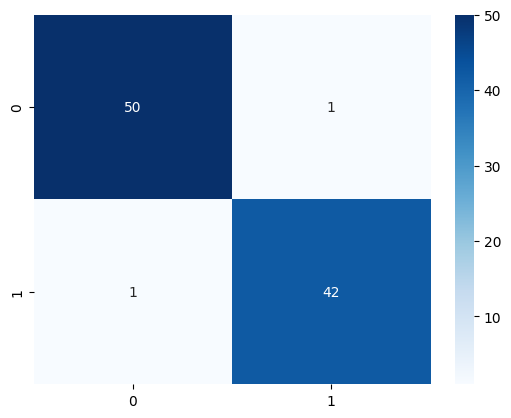

In [67]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

## Support Vector Machine (SVM).

In [68]:
svm_pipeline = make_pipeline(RobustScaler(),
                            KernelPCA(n_components = 12, kernel = 'rbf'),
                            SVC(kernel = 'rbf', gamma = 5, C = 100,
                               random_state = 1, probability=True))

In [69]:
train_scores, validation_scores = validation_curve(estimator = svm_pipeline,
                                                  X = xtrain, y = ytrain,
                                                  scoring = 'accuracy',
                                                  param_name = 'svc__C',
                                                  param_range = param_range,
                                                  cv = 10)

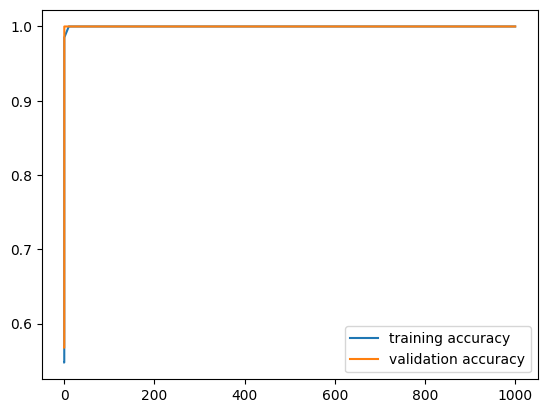

In [70]:
plt.plot(param_range, np.max(train_scores, axis = 1), label = 'training accuracy')
plt.plot(param_range, np.max(validation_scores, axis = 1), label = 'validation accuracy')
plt.legend()

In [71]:
search_for_best = GridSearchCV(estimator = svm_pipeline,
                              param_grid = [{
                                  'svc__kernel': ['rbf', 'linear'],
                                  'svc__C': param_range,
                                  'svc__gamma': param_range

                              }],
                              scoring = 'accuracy', cv = 10)
search_for_best.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('kernelpca',
                                        KernelPCA(kernel='rbf',
                                                  n_components=12)),
                                       ('svc',
                                        SVC(C=100, gamma=5, probability=True,
                                            random_state=1))]),
             param_grid=[{'svc__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 50,
                                     100, 1000],
                          'svc__gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10,
                                         50, 100, 1000],
                          'svc__kernel': ['rbf', 'linear']}],
             scoring='accuracy')

In [72]:
search_for_best.best_score_

0.9811522048364154

In [73]:
search_for_best.best_params_

{'svc__C': 50, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [74]:
svm_pipeline = search_for_best.best_estimator_

In [75]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain,
                                               ytrain,
                                               svm_pipeline)

k: 0, train acc: 0.9830508474576272, and validation acc: 1.0
k: 1, train acc: 0.9830508474576272, and validation acc: 1.0
k: 2, train acc: 0.9830508474576272, and validation acc: 1.0
k: 3, train acc: 0.9830508474576272, and validation acc: 1.0
k: 4, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 5, train acc: 0.9858757062146892, and validation acc: 1.0
k: 6, train acc: 0.9830508474576272, and validation acc: 1.0
k: 7, train acc: 0.9830508474576272, and validation acc: 1.0
k: 8, train acc: 0.9830508474576272, and validation acc: 1.0
k: 9, train acc: 0.9830508474576272, and validation acc: 1.0
k: 10, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 11, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 12, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 13, train acc: 0.9887323943661972, and validation acc: 0.9444444444444444
k: 14, train acc: 0.9830985915492958, and validation acc: 1.0
k: 15

In [76]:
index = 18
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
svm_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kernelpca', KernelPCA(kernel='rbf', n_components=12)),
                ('svc',
                 SVC(C=50, gamma=0.1, probability=True, random_state=1))])

In [77]:
len(xtraining), len(xvalid)

(355, 18)

In [78]:
svm_pipeline.score(xtraining, ytraining), svm_pipeline.score(xvalid, yvalid)

(0.9830985915492958, 1.0)

In [79]:
svm_pipeline.score(xtest, ytest)

0.9893617021276596

In [80]:
y_pred = svm_pipeline.predict(xtest)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

In [81]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        42

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



<Axes: >

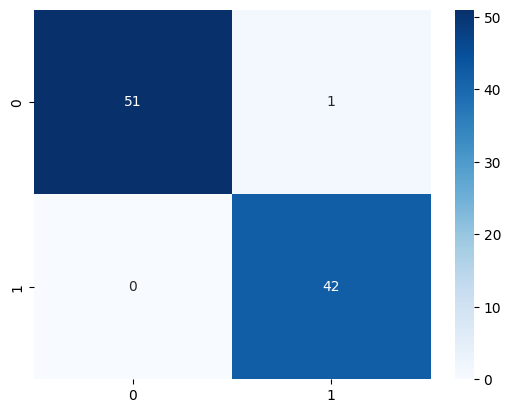

In [82]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

## KNN Classifier

In [83]:
from sklearn.feature_selection import SelectFromModel

In [84]:
knn_pipeline = make_pipeline(
                            SelectFromModel(estimator = RandomForestClassifier(
                            n_estimators = 1000, max_depth = 2), threshold = 0.05),
                            RobustScaler(),
                            KNeighborsClassifier(metric = 'minkowski',
                                                 n_neighbors = 3,
                                                 p = 2))

In [85]:
search_for_best_knn_params = GridSearchCV(
                                         scoring = 'accuracy',
                                         estimator = knn_pipeline,
                                         param_grid = [{
                                             'kneighborsclassifier__n_neighbors':[2, 3, 4, 5, 6, 7, 8],
                                             'kneighborsclassifier__p': [1, 2]
                                         }],
                                         cv = 10)
search_for_best_knn_params.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier(max_depth=2,
                                                                                         n_estimators=1000),
                                                        threshold=0.05)),
                                       ('robustscaler', RobustScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid=[{'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6,
                                                                7, 8],
                          'kneighborsclassifier__p': [1, 2]}],
             scoring='accuracy')

In [86]:
search_for_best_knn_params.best_score_

0.9812233285917497

In [87]:
search_for_best_knn_params.best_params_

{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 1}

In [88]:
knn_pipeline = search_for_best_knn_params.best_estimator_

In [89]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain,
                                               ytrain,
                                               knn_pipeline)

k: 0, train acc: 0.9774011299435028, and validation acc: 1.0
k: 1, train acc: 0.9830508474576272, and validation acc: 1.0
k: 2, train acc: 0.9745762711864406, and validation acc: 1.0
k: 3, train acc: 0.9774011299435028, and validation acc: 1.0
k: 4, train acc: 0.9858757062146892, and validation acc: 0.9473684210526315
k: 5, train acc: 0.9774011299435028, and validation acc: 1.0
k: 6, train acc: 0.980225988700565, and validation acc: 0.9473684210526315
k: 7, train acc: 0.9774011299435028, and validation acc: 1.0
k: 8, train acc: 0.9774011299435028, and validation acc: 1.0
k: 9, train acc: 0.9774011299435028, and validation acc: 1.0
k: 10, train acc: 0.980225988700565, and validation acc: 1.0
k: 11, train acc: 0.980225988700565, and validation acc: 0.9473684210526315
k: 12, train acc: 0.980225988700565, and validation acc: 0.8947368421052632
k: 13, train acc: 0.9887323943661972, and validation acc: 0.9444444444444444
k: 14, train acc: 0.9830985915492958, and validation acc: 1.0
k: 15, tr

In [90]:
index = 16
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
knn_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=2,
                                                                  n_estimators=1000),
                                 threshold=0.05)),
                ('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=6, p=1))])

In [91]:
knn_pipeline.score(xtraining, ytraining), knn_pipeline.score(xvalid, yvalid)

(0.9774647887323944, 1.0)

In [92]:
knn_pipeline.score(xtest, ytest)

0.9787234042553191

In [93]:
y_pred = knn_pipeline.predict(xtest)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

In [94]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        43

    accuracy                           0.98        94
   macro avg       0.98      0.98      0.98        94
weighted avg       0.98      0.98      0.98        94



<Axes: >

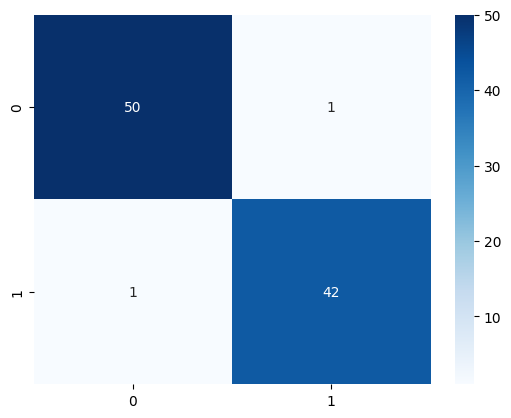

In [95]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

## Majority Voting Classifier

- The proposed final methodology to deal with teamwork in the ability to predict accurately, through the use of several pre-trained models.
- The methodology depends on the fact that each model has a degree of importance in determining the final decision, and therefore, we work on weighing each previously trained model. The process of weighing the pre-trained models must be accurate, so that the largest weight is given to the model that was able to reach accuracy. higher (as we seek to support his decision and fix the error he makes, by providing other models that can correct what he does).

- weights = [weightModel_1, weightModel_2, weightModel_3]
- P(y= 0 | x) =  weightModel_1 * P_m1(y= 0 | x) + weightModel_2 * P_m2(y= 0 | x) + weightModel_3 * P_m3(y= 0 | x)

- P(y= 1 | x) =  weightModel_1 * P_m1(y= 1 | x) + weightModel_2 * P_m2(y= 1 | x) + weightModel_3 * P_m3(y= 1 | x)

In [96]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import _name_estimators
class MajorityVoting:
    def __init__(self, classifiers, weights):
        self.classifiers = classifiers
        self.weights = weights
    def fit(self, features, labels):
        return self
    def predict_proba(self, x):
        predicts_ = np.array([classifier.predict_proba(x) for classifier in self.classifiers])
        weighted_predict_proba = np.average(predicts_,
                                           axis = 0,
                                           weights = self.weights)
        return weighted_predict_proba
    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis = 1)
    def score(self, features, labels):
        y_pred = np.argmax(self.predict_proba(features), axis = 1)
        return accuracy_score(labels, y_pred)

In [97]:
def get_proba(estimator, data):
    y_pred = estimator.predict_proba(data)
    y_pred_indexs = np.argmax(y_pred, axis = 1)
    return [y_pred[index, value] for index, value in enumerate(y_pred_indexs)]

In [98]:
xtrain_up = np.vstack([
    get_proba(logistic_regression_pipe, xtrain),
    get_proba(svm_pipeline, xtrain),
    get_proba(knn_pipeline, xtrain)
])
xtrain_up = np.reshape(xtrain_up, (xtrain_up.shape[1], xtrain_up.shape[0]))
xtrain_up.shape

(373, 3)

In [99]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
boost = AdaBoostClassifier(estimator = DecisionTreeClassifier(criterion = 'gini'),
                           random_state = 1,)
boost.fit(xtrain_up, ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [100]:
boost.score(xtrain_up, ytrain)

0.8552278820375335

In [101]:
features_importances = np.mean([tree.feature_importances_ for tree in boost.estimators_], axis = 0)/3
features_importances

array([0.09049883, 0.14498346, 0.09785104])

In [102]:
features_importances = np.mean([[0.6, 0.1, 0.1], features_importances], axis = 0)
features_importances

array([0.34524942, 0.12249173, 0.09892552])

In [103]:
majority_vote = MajorityVoting([
                                logistic_regression_pipe,
                                svm_pipeline,
                                knn_pipeline,],
                                weights = features_importances)

In [104]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain,
                                               ytrain,
                                               majority_vote)

k: 0, train acc: 0.9858757062146892, and validation acc: 1.0
k: 1, train acc: 0.9858757062146892, and validation acc: 1.0
k: 2, train acc: 0.9858757062146892, and validation acc: 1.0
k: 3, train acc: 0.9858757062146892, and validation acc: 1.0
k: 4, train acc: 0.9887005649717514, and validation acc: 0.9473684210526315
k: 5, train acc: 0.9858757062146892, and validation acc: 1.0
k: 6, train acc: 0.9858757062146892, and validation acc: 1.0
k: 7, train acc: 0.9858757062146892, and validation acc: 1.0
k: 8, train acc: 0.9858757062146892, and validation acc: 1.0
k: 9, train acc: 0.9858757062146892, and validation acc: 1.0
k: 10, train acc: 0.9858757062146892, and validation acc: 1.0
k: 11, train acc: 0.9887005649717514, and validation acc: 0.9473684210526315
k: 12, train acc: 0.9887005649717514, and validation acc: 0.9473684210526315
k: 13, train acc: 0.9887323943661972, and validation acc: 0.9444444444444444
k: 14, train acc: 0.9859154929577465, and validation acc: 1.0
k: 15, train acc: 0.

In [105]:
index = 16
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
majority_vote.fit(xtrain, ytrain)

In [106]:
majority_vote.score(xtraining, ytraining), majority_vote.score(xvalid, yvalid)

(0.9859154929577465, 1.0)

In [107]:
majority_vote.score(xtest, ytest)

0.9787234042553191

In [108]:
y_pred = majority_vote.predict(xtest)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

In [109]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        43

    accuracy                           0.98        94
   macro avg       0.98      0.98      0.98        94
weighted avg       0.98      0.98      0.98        94



<Axes: >

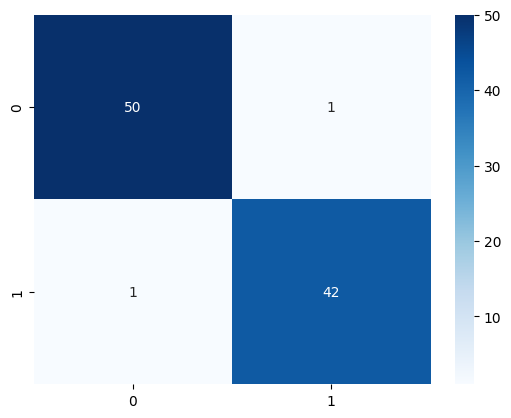

In [110]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

- We note that the proposed collective model provided a better result than the rest of the algorithms on the test data, except for the LogisticRegression algorithm, as shown in the following table.
- But if we review the result and accuracy of the individual models and the collective work model on all the data contained in the dataset, we will notice that the proposed collective model is the best in terms of accuracy.
- The proposed group model performed better on both training, test and validation data in contrast to the other individual algorithms.
- We can see that the performance of the algorithm group work its accuracy increases with the increase of the accuracy of the individual algorithms.
- We can also be sure that increasing the number of individual algorithms will lead to an increase in the accuracy of the collective model.

## Final Result - For Testing Data:

In [111]:
res = pd.DataFrame({
    'Models Used': ['LogisticRegression',
                    'KNN Classification',
                    'Support Vector Machine',
                    'Majority Voting'],
    'Testing Data Accuracy': [logistic_regression_pipe.score(xtest, ytest)*100,
                             knn_pipeline.score(xtest, ytest)*100,
                             svm_pipeline.score(xtest, ytest)*100,
                             majority_vote.score(xtest, ytest)*100]
})
res.head()

,Models Used,Testing Data Accuracy
0,LogisticRegression,97.872
1,KNN Classification,97.872
2,Support Vector Machine,98.936
3,Majority Voting,97.872


## Final Result - For All Data in Dataset:

In [112]:
res = pd.DataFrame({
    'Models Used': ['LogisticRegression',
                    'KNN Classification',
                    'Support Vector Machine',
                    'Majority Voting'],
    'All Data Accuracy': [logistic_regression_pipe.score(features, labels)*100,
                             knn_pipeline.score(features, labels)*100,
                             svm_pipeline.score(features, labels)*100,
                             majority_vote.score(features, labels)*100]
})
res.head()

,Models Used,All Data Accuracy
0,LogisticRegression,98.287
1,KNN Classification,97.859
2,Support Vector Machine,98.501
3,Majority Voting,98.501


## Thank you so much. Sincerely, Eslam Fouad!